# Stage 1: Understanding Linear Regression From Scratch
Open this Notebook in Google Colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your_github_username/ML-Journey/blob/main/notebooks/Linear%20Regression/implementation.ipynb)


## Introduction and Imports

In [9]:
# Essential libraries for numerical operations and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List
import plotly.express as px
import plotly.graph_objects as go

# Set random seed for reproducibility
np.random.seed(42)

# Configure plot styling
sns.set_theme(style="whitegrid")

## Generating Synthetic Data

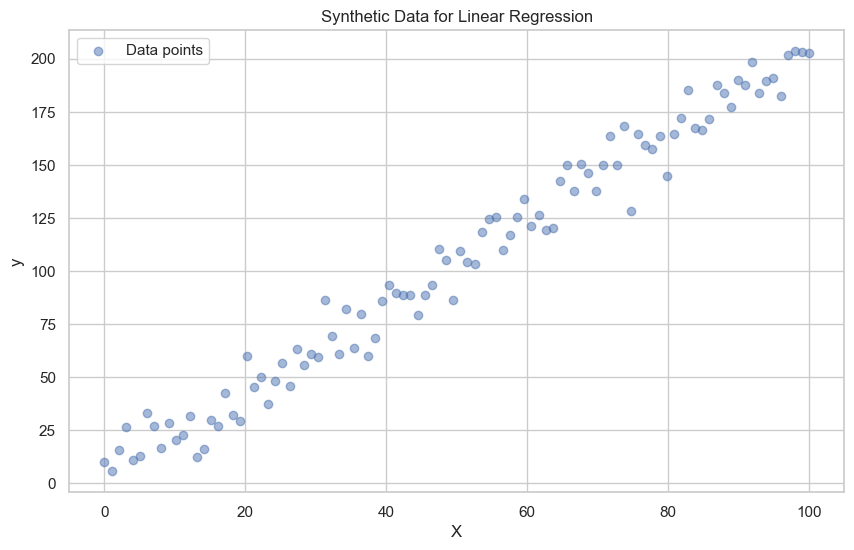

In [10]:
def generate_data(n_samples: int = 100, noise: float = 10) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generate synthetic data for linear regression.
    
    Parameters:
        n_samples: Number of data points
        noise: Standard deviation of Gaussian noise
    
    Returns:
        X: Input features (n_samples, 1)
        y: Target values (n_samples,)
    """
    # Generate evenly spaced points
    X = np.linspace(0, 100, n_samples).reshape(-1, 1)
    
    # True relationship: y = 2x + 5 + noise
    true_slope = 2
    true_intercept = 5
    y = true_slope * X.squeeze() + true_intercept + np.random.normal(0, noise, n_samples)
    
    return X, y

# Generate data
X, y = generate_data()

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.legend()
plt.show()

## Linear Regression Class Implementation

In [11]:
class LinearRegressionFromScratch:
    def __init__(self, learning_rate: float = 0.01, n_iterations: int = 1000):
        """
        Initialize Linear Regression model.
        
        Parameters:
            learning_rate: Step size for gradient descent
            n_iterations: Number of training iterations
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.history = {'loss': [], 'weights': [], 'bias': []}
        
    def _initialize_parameters(self, n_features: int):
        """Initialize weights and bias."""
        self.weights = np.zeros(n_features)
        self.bias = 0
        
    def _forward(self, X: np.ndarray) -> np.ndarray:
        """Compute predictions."""
        return np.dot(X, self.weights) + self.bias
    
    def _compute_gradients(self, X: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> Tuple[np.ndarray, float]:
        """Compute gradients for weights and bias."""
        m = X.shape[0]
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        return dw, db
    
    def _compute_loss(self, y: np.ndarray, y_pred: np.ndarray) -> float:
        """Compute Mean Squared Error loss."""
        return np.mean((y_pred - y) ** 2) / 2
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Train the linear regression model using gradient descent.
        
        Parameters:
            X: Training features (n_samples, n_features)
            y: Target values (n_samples,)
        """
        # Initialize parameters
        self._initialize_parameters(X.shape[1])
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Forward pass
            y_pred = self._forward(X)
            
            # Compute gradients
            dw, db = self._compute_gradients(X, y, y_pred)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Store history
            loss = self._compute_loss(y, y_pred)
            self.history['loss'].append(loss)
            self.history['weights'].append(self.weights.copy())
            self.history['bias'].append(self.bias)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions for given input features."""
        return self._forward(X)

## Training Visualization Class

In [12]:
class TrainingVisualizer:
    @staticmethod
    def plot_training_history(history: dict):
        """
        Create an interactive plot of training history.
        
        Parameters:
            history: Dictionary containing loss history
        """
        fig = go.Figure()
        fig.add_trace(go.Scatter(
            y=history['loss'],
            mode='lines',
            name='Training Loss'
        ))
        
        fig.update_layout(
            title='Training History',
            xaxis_title='Iteration',
            yaxis_title='Loss',
            template='plotly_white'
        )
        
        return fig
    
    @staticmethod
    def plot_regression_line(X: np.ndarray, y: np.ndarray, model: LinearRegressionFromScratch):
        """
        Plot data points and regression line.
        
        Parameters:
            X: Input features
            y: Target values
            model: Trained linear regression model
        """
        fig = go.Figure()
        
        # Add data points
        fig.add_trace(go.Scatter(
            x=X.squeeze(),
            y=y,
            mode='markers',
            name='Data Points',
            marker=dict(size=8, opacity=0.6)
        ))
        
        # Add regression line
        y_pred = model.predict(X)
        fig.add_trace(go.Scatter(
            x=X.squeeze(),
            y=y_pred,
            mode='lines',
            name='Regression Line',
            line=dict(color='red', width=2)
        ))
        
        fig.update_layout(
            title='Linear Regression Fit',
            xaxis_title='X',
            yaxis_title='y',
            template='plotly_white'
        )
        
        return fig

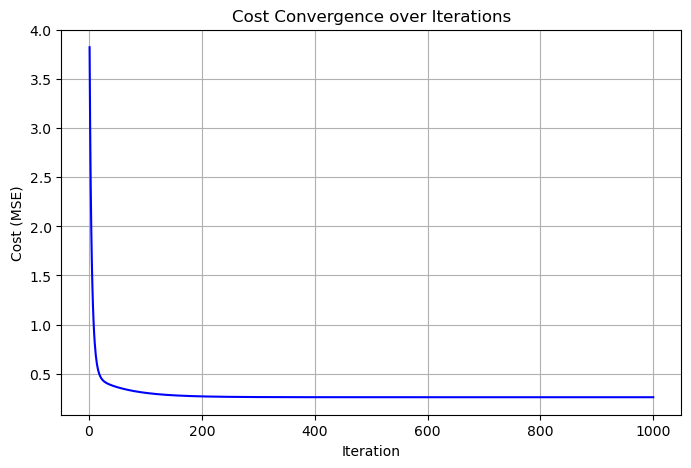

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_iterations+1), cost_history, color='blue')
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Convergence over Iterations")
plt.grid(True)
plt.show()


## Training and Visualization

In [13]:
# Create and train model
model = LinearRegressionFromScratch(learning_rate=0.0001, n_iterations=200)
model.fit(X, y)

# Create visualizer
visualizer = TrainingVisualizer()

# Plot training history
history_plot = visualizer.plot_training_history(model.history)
history_plot.show()

# Plot regression line
regression_plot = visualizer.plot_regression_line(X, y, model)
regression_plot.show()

# Print final parameters
print(f"Final weights: {model.weights}")
print(f"Final bias: {model.bias}")

Final weights: [2.06192416]
Final bias: 0.0471840785184594


## Model Evaluation

In [14]:
def evaluate_model(y_true: np.ndarray, y_pred: np.ndarray):
    """
    Compute various evaluation metrics.
    
    Parameters:
        y_true: True target values
        y_pred: Predicted values
    """
    # Mean Squared Error
    mse = np.mean((y_true - y_pred) ** 2)
    
    # Root Mean Squared Error
    rmse = np.sqrt(mse)
    
    # R-squared score
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared Score: {r2:.4f}")

# Evaluate model
y_pred = model.predict(X)
evaluate_model(y, y_pred)

Mean Squared Error: 84.1293
Root Mean Squared Error: 9.1722
R-squared Score: 0.9762


## Assumptions Check

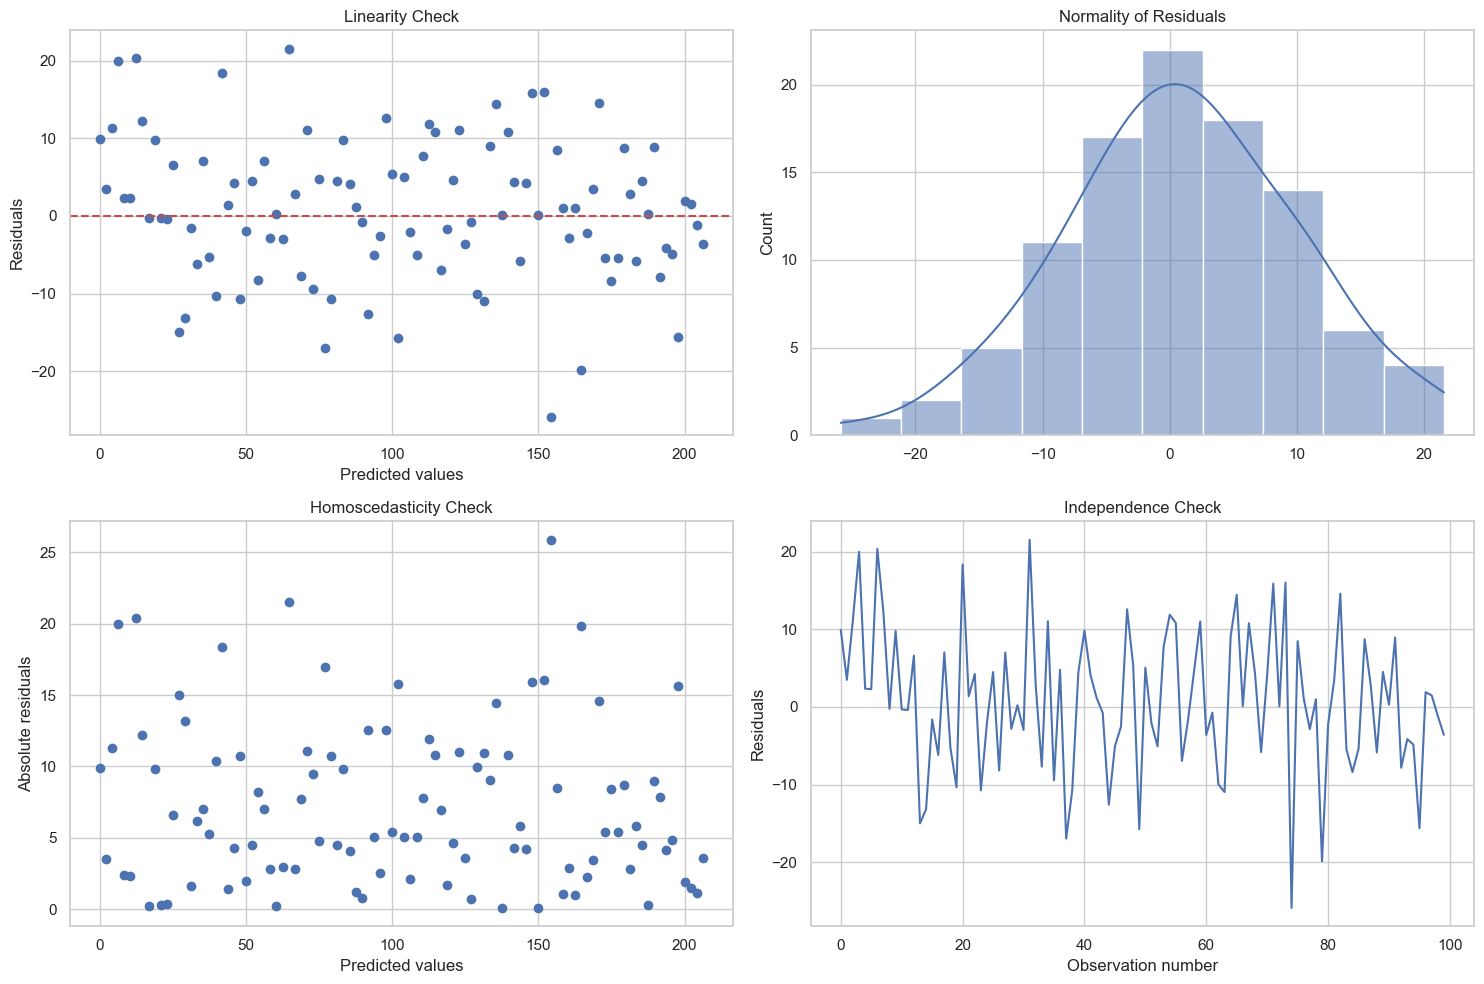

In [15]:
def check_assumptions(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray):
    """
    Check linear regression assumptions.
    
    Parameters:
        X: Input features
        y: True target values
        y_pred: Predicted values
    """
    # Calculate residuals
    residuals = y - y_pred
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Linearity
    axes[0, 0].scatter(y_pred, residuals)
    axes[0, 0].axhline(y=0, color='r', linestyle='--')
    axes[0, 0].set_xlabel('Predicted values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Linearity Check')
    
    # 2. Normality of residuals
    sns.histplot(residuals, kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Normality of Residuals')
    
    # 3. Homoscedasticity
    axes[1, 0].scatter(y_pred, np.abs(residuals))
    axes[1, 0].set_xlabel('Predicted values')
    axes[1, 0].set_ylabel('Absolute residuals')
    axes[1, 0].set_title('Homoscedasticity Check')
    
    # 4. Independence
    axes[1, 1].plot(residuals)
    axes[1, 1].set_xlabel('Observation number')
    axes[1, 1].set_ylabel('Residuals')
    axes[1, 1].set_title('Independence Check')
    
    plt.tight_layout()
    plt.show()

# Check assumptions
check_assumptions(X, y, y_pred)

# Stage 2: Advanced Linear Regression Features

## Introduction and Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Optional, Union
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

 ## Advanced Linear Regression Implementation

In [17]:
class AdvancedLinearRegression:
    """
    An advanced implementation of Linear Regression that includes:
    - Multiple feature support
    - Polynomial features
    - Regularization (L1-Lasso and L2-Ridge)
    - K-fold cross-validation
    """
    def __init__(
        self, 
        learning_rate: float = 0.01,
        n_iterations: int = 1000,
        polynomial_degree: int = 1,
        regularization: Optional[str] = None,
        lambda_reg: float = 0.1
    ):
        """
        Initialize the advanced linear regression model.
        
        Parameters:
            learning_rate: Step size for gradient descent
            n_iterations: Number of training iterations
            polynomial_degree: Degree of polynomial features
            regularization: Type of regularization ('l1' for Lasso, 'l2' for Ridge)
            lambda_reg: Regularization strength
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.polynomial_degree = polynomial_degree
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        
        self.weights = None
        self.bias = None
        self.poly_transformer = None
        self.scaler = StandardScaler()
        self.history = {'loss': [], 'val_loss': [], 'weights': [], 'bias': []}
    
    def _generate_polynomial_features(self, X: np.ndarray) -> np.ndarray:
        """Generate polynomial features up to specified degree."""
        if self.poly_transformer is None:
            self.poly_transformer = PolynomialFeatures(degree=self.polynomial_degree, include_bias=False)
            return self.poly_transformer.fit_transform(X)
        return self.poly_transformer.transform(X)
    
    def _compute_regularization_term(self) -> float:
        """Compute regularization term based on specified type."""
        if self.regularization == 'l1':
            return self.lambda_reg * np.sign(self.weights)  # Lasso
        elif self.regularization == 'l2':
            return self.lambda_reg * self.weights  # Ridge
        return 0
    
    def _forward(self, X: np.ndarray) -> np.ndarray:
        """Forward pass with polynomial features."""
        X_poly = self._generate_polynomial_features(X)
        return np.dot(X_poly, self.weights) + self.bias
    
    def _compute_gradients(
        self, 
        X: np.ndarray, 
        y: np.ndarray, 
        y_pred: np.ndarray
    ) -> Tuple[np.ndarray, float]:
        """Compute gradients with regularization."""
        m = X.shape[0]
        X_poly = self._generate_polynomial_features(X)
        
        # Compute basic gradients
        dw = (1/m) * np.dot(X_poly.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        # Add regularization term
        if self.regularization:
            dw += self._compute_regularization_term()
            
        return dw, db
    
    def _compute_loss(
        self, 
        y: np.ndarray, 
        y_pred: np.ndarray, 
        include_reg: bool = True
    ) -> float:
        """Compute loss with regularization term."""
        mse = np.mean((y_pred - y) ** 2) / 2
        
        if include_reg and self.regularization:
            if self.regularization == 'l1':
                reg_term = self.lambda_reg * np.sum(np.abs(self.weights))
            else:  # l2
                reg_term = self.lambda_reg * np.sum(self.weights ** 2) / 2
            return mse + reg_term
        
        return mse
    
    def fit(
        self, 
        X: np.ndarray, 
        y: np.ndarray,
        X_val: Optional[np.ndarray] = None,
        y_val: Optional[np.ndarray] = None
    ):
        """
        Train the model with support for validation data.
        
        Parameters:
            X: Training features
            y: Training target
            X_val: Validation features (optional)
            y_val: Validation target (optional)
        """
        # Scale features
        X = self.scaler.fit_transform(X)
        if X_val is not None:
            X_val = self.scaler.transform(X_val)
        
        # Initialize parameters
        n_features = self._generate_polynomial_features(X).shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for i in range(self.n_iterations):
            # Forward pass
            y_pred = self._forward(X)
            
            # Compute gradients
            dw, db = self._compute_gradients(X, y, y_pred)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Store training history
            train_loss = self._compute_loss(y, y_pred)
            self.history['loss'].append(train_loss)
            
            # Compute validation loss if validation data is provided
            if X_val is not None and y_val is not None:
                val_pred = self._forward(X_val)
                val_loss = self._compute_loss(y_val, val_pred)
                self.history['val_loss'].append(val_loss)
            
            self.history['weights'].append(self.weights.copy())
            self.history['bias'].append(self.bias)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions for given input features."""
        X_scaled = self.scaler.transform(X)
        return self._forward(X_scaled)

## Cross-Validation Implementation

In [18]:
class CrossValidator:
    """Implements k-fold cross-validation for model evaluation."""
    
    def __init__(self, n_splits: int = 5):
        """
        Initialize cross-validator.
        
        Parameters:
            n_splits: Number of folds for cross-validation
        """
        self.n_splits = n_splits
        self.kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    def cross_validate(
        self, 
        model_class: type,
        X: np.ndarray, 
        y: np.ndarray,
        **model_params
    ) -> Tuple[List[float], List[AdvancedLinearRegression]]:
        """
        Perform k-fold cross-validation.
        
        Parameters:
            model_class: Class of the model to validate
            X: Input features
            y: Target values
            **model_params: Parameters for model initialization
            
        Returns:
            scores: List of validation scores
            models: List of trained models
        """
        scores = []
        models = []
        
        for train_idx, val_idx in self.kf.split(X):
            # Split data
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]
            
            # Create and train model
            model = model_class(**model_params)
            model.fit(X_train, y_train, X_val, y_val)
            
            # Compute validation score
            y_pred = model.predict(X_val)
            val_score = model._compute_loss(y_val, y_pred, include_reg=False)
            
            scores.append(val_score)
            models.append(model)
        
        return scores, models

## Advanced Visualization Tools

In [19]:
class AdvancedVisualizer:
    """Provides advanced visualization tools for model analysis."""
    
    @staticmethod
    def plot_training_history(history: dict):
        """Plot training and validation loss history."""
        fig = go.Figure()
        
        # Plot training loss
        fig.add_trace(go.Scatter(
            y=history['loss'],
            mode='lines',
            name='Training Loss'
        ))
        
        # Plot validation loss if available
        if 'val_loss' in history and history['val_loss']:
            fig.add_trace(go.Scatter(
                y=history['val_loss'],
                mode='lines',
                name='Validation Loss'
            ))
        
        fig.update_layout(
            title='Training History',
            xaxis_title='Iteration',
            yaxis_title='Loss',
            template='plotly_white'
        )
        
        return fig
    
    @staticmethod
    def plot_polynomial_fit(
        X: np.ndarray, 
        y: np.ndarray, 
        models: List[AdvancedLinearRegression]
    ):
        """Plot polynomial regression fits of different degrees."""
        fig = go.Figure()
        
        # Plot original data points
        fig.add_trace(go.Scatter(
            x=X.squeeze(),
            y=y,
            mode='markers',
            name='Data Points',
            marker=dict(size=8, opacity=0.6)
        ))
        
        # Plot predictions for each model
        colors = px.colors.qualitative.Set1
        for i, model in enumerate(models):
            X_sorted = np.sort(X, axis=0)
            y_pred = model.predict(X_sorted)
            
            fig.add_trace(go.Scatter(
                x=X_sorted.squeeze(),
                y=y_pred,
                mode='lines',
                name=f'Degree {model.polynomial_degree}',
                line=dict(color=colors[i % len(colors)])
            ))
        
        fig.update_layout(
            title='Polynomial Regression Fits',
            xaxis_title='X',
            yaxis_title='y',
            template='plotly_white'
        )
        
        return fig

## Generate Complex Dataset

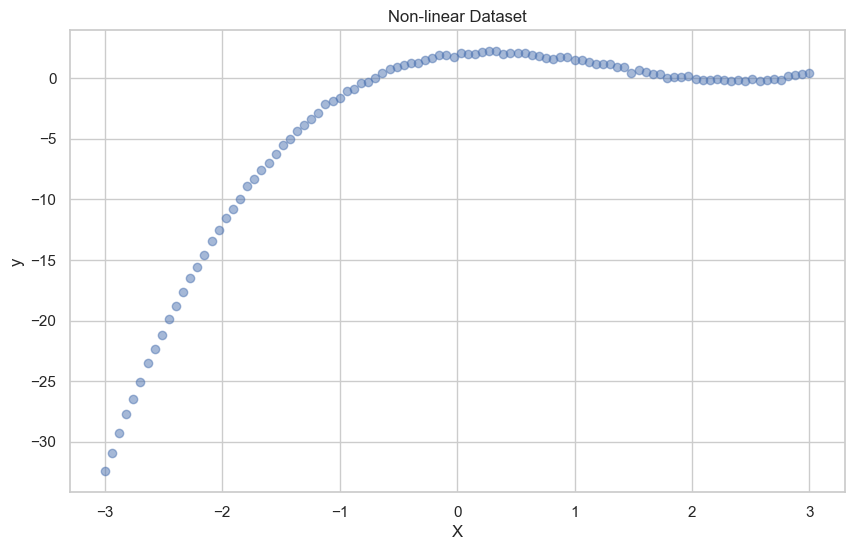

In [20]:
def generate_complex_data(
    n_samples: int = 100,
    noise: float = 0.1
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generate non-linear data for polynomial regression.
    
    Parameters:
        n_samples: Number of samples
        noise: Noise level
        
    Returns:
        X: Input features
        y: Target values
    """
    X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
    y = 0.5 * X.squeeze()**3 - 2 * X.squeeze()**2 + X.squeeze() + 2
    y += np.random.normal(0, noise, n_samples)
    return X, y

# Generate data
X, y = generate_complex_data()

# Visualize raw data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear Dataset')
plt.show()

## Model Training and Evaluation

In [21]:
# Create models with different polynomial degrees
degrees = [1, 2, 3, 4]
models = []

for degree in degrees:
    model = AdvancedLinearRegression(
        learning_rate=0.01,
        n_iterations=1000,
        polynomial_degree=degree,
        regularization='l2',
        lambda_reg=0.01
    )
    model.fit(X, y)
    models.append(model)

# Create visualizer
visualizer = AdvancedVisualizer()

# Plot polynomial fits
poly_plot = visualizer.plot_polynomial_fit(X, y, models)
poly_plot.show()

# Plot training history for the cubic model
history_plot = visualizer.plot_training_history(models[2].history)
history_plot.show()

## Cross-validation Analysis

In [22]:
# Perform cross-validation
cv = CrossValidator(n_splits=5)
best_degree = None
best_score = float('inf')

for degree in degrees:
    scores, _ = cv.cross_validate(
        AdvancedLinearRegression,
        X, y,
        learning_rate=0.01,
        n_iterations=1000,
        polynomial_degree=degree,
        regularization='l2',
        lambda_reg=0.01
    )
    
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    print(f"Degree {degree}:")
    print(f"Mean CV Score: {mean_score:.4f} (+/- {std_score:.4f})")
    
    if mean_score < best_score:
        best_score = mean_score
        best_degree = degree

print(f"\nBest polynomial degree: {best_degree}")

Degree 1:
Mean CV Score: 17.8169 (+/- 2.5651)
Degree 2:
Mean CV Score: 2.5240 (+/- 0.6650)
Degree 3:
Mean CV Score: 0.0458 (+/- 0.0637)
Degree 4:
Mean CV Score: 0.5419 (+/- 0.4074)

Best polynomial degree: 3


# Stage 3: Real-world Application - Housing Price Prediction

## Setup and Imports

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For reproducibility
np.random.seed(42)


## Data Loading and Preprocessing

In [34]:
# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data        # Features: shape (m, n)
y = housing.target.reshape(-1, 1)  # Target: median house value, shape (m, 1)

# Optionally, inspect feature names
print("Feature Names:", housing.feature_names)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for gradient descent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Add a bias term (column of ones) to each set for the intercept
m_train = X_train_scaled.shape[0]
m_test  = X_test_scaled.shape[0]

X_train_b = np.c_[np.ones((m_train, 1)), X_train_scaled]  # shape: (m_train, n+1)
X_test_b  = np.c_[np.ones((m_test, 1)), X_test_scaled]      # shape: (m_test, n+1)


Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [35]:
def compute_cost(X, y, theta):
    """
    Compute the Mean Squared Error cost function.
    """
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    """
    Perform gradient descent to minimize the cost function.
    Returns the final theta and a history of cost values.
    """
    m = len(y)
    cost_history = []
    for i in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1/m) * X.T.dot(errors)
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        # Optionally, print cost every 100 iterations
        if (i+1) % 100 == 0:
            print(f"Iteration {i+1}: Cost {cost:.4f}")
    return theta, cost_history


In [36]:
# Initialize parameters randomly (n+1 x 1 vector)
n_features = X_train_b.shape[1]
theta_initial = np.random.randn(n_features, 1)

# Set hyperparameters
learning_rate = 0.1
n_iterations = 1000

# Run gradient descent on the training set
theta_final, cost_history = gradient_descent(X_train_b, y_train, theta_initial, learning_rate, n_iterations)

print("Final parameters:\n", theta_final)
print("Final training cost:", cost_history[-1])


Iteration 100: Cost 0.3036
Iteration 200: Cost 0.2674
Iteration 300: Cost 0.2606
Iteration 400: Cost 0.2593
Iteration 500: Cost 0.2590
Iteration 600: Cost 0.2590
Iteration 700: Cost 0.2590
Iteration 800: Cost 0.2590
Iteration 900: Cost 0.2590
Iteration 1000: Cost 0.2590
Final parameters:
 [[ 2.07194694]
 [ 0.85413644]
 [ 0.12256173]
 [-0.29384816]
 [ 0.33874407]
 [-0.00230086]
 [-0.04082414]
 [-0.89700438]
 [-0.86988251]]
Final training cost: 0.2589665842453208


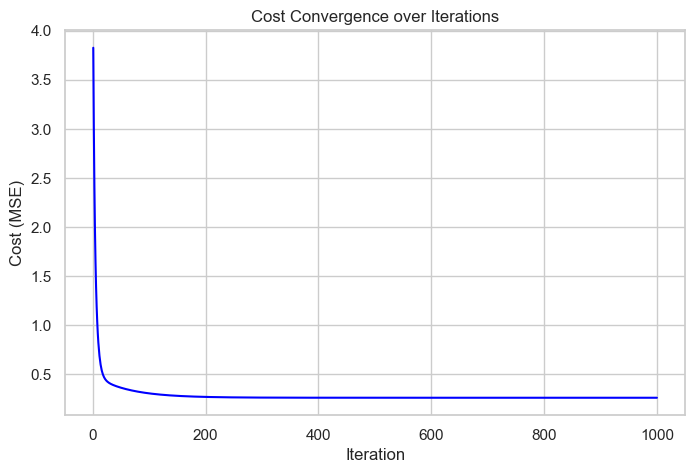

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_iterations+1), cost_history, color='blue')
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Convergence over Iterations")
plt.grid(True)
plt.show()


Test RMSE: 0.7455


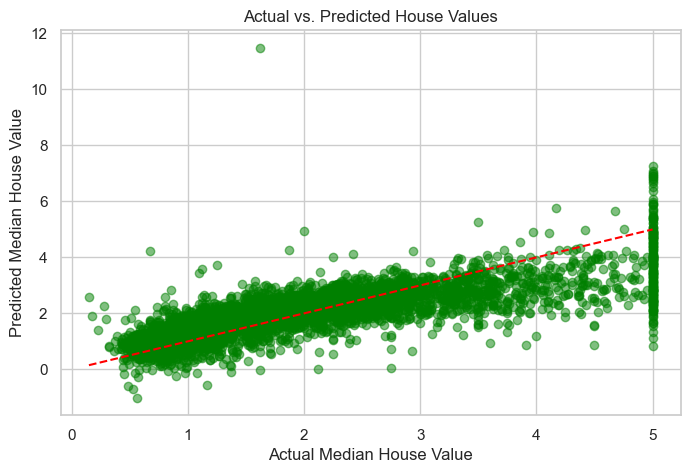

In [38]:
# Make predictions on the test set
y_pred = X_test_b.dot(theta_final)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(f"Test RMSE: {rmse:.4f}")

# Plot actual vs. predicted values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted House Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()


# Conclusion

We have successfully implemented multiple linear regression from scratch using gradient descent on the California Housing dataset. The cost function decreased over iterations, and our model achieved a reasonable RMSE on the test set.

### Future Work
- **Regularization:** Incorporate L1 or L2 regularization to prevent overfitting.
- **Feature Engineering:** Explore polynomial or interaction features to capture non-linear relationships.
- **Adaptive Optimization:** Experiment with adaptive learning rate optimizers like Adam.
- **Model Interpretability:** Develop tools to analyze feature importance and generate partial dependence plots.
- **Deployment:** Consider extending the implementation to deploy the model as a REST API and monitor its performance in production.

This notebook lays the foundation for deeper experimentation and further research into more advanced predictive models.
